<a href="https://colab.research.google.com/github/Alphonslal/ANN-Worksheet/blob/main/ANN_Worksheet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded =  files.upload()

Saving diabetes (1).csv to diabetes (1).csv


In [8]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. LOAD DATA
# Assume 'diabetes.csv' is in the current directory
df = pd.read_csv('diabetes (1).csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# 2. PREPROCESSING
# TODO: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. BUILD MODEL
model = Sequential()
# TODO: Add Input and first Hidden Layer (12 neurons, ReLU)
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))

# TODO: Add second Hidden Layer (8 neurons, ReLU)
model.add(Dense(8, activation='relu'))

# TODO: Add Output Layer (1 neuron, Sigmoid)
model.add(Dense(1, activation='sigmoid'))

# 4. COMPILE & TRAIN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# 5. EVALUATE
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.22f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7138 - loss: 0.5850 
Test Accuracy: 72.0779240131378173828125%


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


print(device)

cpu


In [11]:
import multiprocessing
print(multiprocessing.cpu_count())

2


In [12]:
import multiprocessing

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 79.6MB/s]


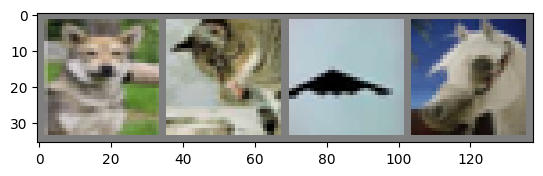

dog   cat   plane horse


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [14]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3*32*32 X 5*5 ==> 6*28*28
        self.pool = nn.MaxPool2d(2, 2) # 6*28*28 ==> 6*14*14
        self.conv2 = nn.Conv2d(6, 16, 5) # 6*14*14 X 5*5 ==> 16*10*10
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 16*5*5 ==> 120
        self.fc2 = nn.Linear(120, 84) # 120 ==> 84
        self.fc3 = nn.Linear(84, 10) # 84 ==> 10

    def forward(self, x):
        # print(f"{x.size()} before in Conv Layer")

        x = F.relu(self.conv1(x))
        # print(f"{x.size()} after 1st Conv Layer")

        x = self.pool(x)
        # print(f"{x.size()} after pooling Layer")

        x = F.relu(self.conv2(x))
        # print(f"{x.size()} after 2nd Conv Layer")

        x = self.pool(x)
        # print(f"{x.size()} after pooling Layer")

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print(x.size())

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolution layers
        self.conv1 = nn.Conv2d(3, 6, 3)     # (3,32,32) → (6,30,30)
        self.pool = nn.MaxPool2d(2, 2)      # → (6,15,15)

        self.conv2 = nn.Conv2d(6, 32, 3)    # → (32,13,13)
                                           # pool → (32,6,6)

        self.conv3 = nn.Conv2d(32, 16, 2)   # → (16,5,5)
                                           # pool → (16,2,2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 2 * 2, 240)
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = self.pool(x)

        x = torch.flatten(x, 1)  # flatten except batch

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

net = Net()


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolution layers
        self.conv1 = nn.Conv2d(3, 6, 3)     # (3,32,32) → (6,30,30)
        self.pool = nn.MaxPool2d(2, 2)      # → (6,15,15)

        self.conv2 = nn.Conv2d(6, 16, 3)    # → (16,13,13)
                                           # pool → (16,6,6)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1)  # flatten except batch

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()


In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.868
[1,  6000] loss: 1.687
[1,  8000] loss: 1.575
[1, 10000] loss: 1.505
[1, 12000] loss: 1.438
[2,  2000] loss: 1.386
[2,  4000] loss: 1.323
[2,  6000] loss: 1.323
[2,  8000] loss: 1.279
[2, 10000] loss: 1.238
[2, 12000] loss: 1.237
Finished Training


In [19]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

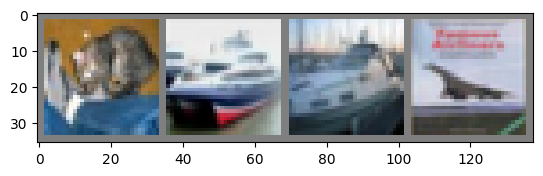

GroundTruth:  cat   ship  ship  plane


In [20]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [22]:
outputs = net(images)

In [23]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [24]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [25]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 57.7 %
Accuracy for class: car   is 59.7 %
Accuracy for class: bird  is 46.8 %
Accuracy for class: cat   is 34.6 %
Accuracy for class: deer  is 51.6 %
Accuracy for class: dog   is 50.6 %
Accuracy for class: frog  is 66.7 %
Accuracy for class: horse is 66.1 %
Accuracy for class: ship  is 82.1 %
Accuracy for class: truck is 58.6 %


In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [27]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
inputs, labels = data[0].to(device), data[1].to(device)